In [7]:
!curl -L "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166" -o final_vg.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1993k  100 1993k    0     0   214k      0  0:00:09  0:00:09 --:--:--  281k


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
import numpy as np

In [10]:
# Load dataset
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


# Bivariate Analysis

Bivariate analysis examines the relationship between **two variables** simultaneously.

**`1. Scatter Plot - Two Numerical Variables`**

Question: What is the relationship between NA_Sales and EU_Sales?

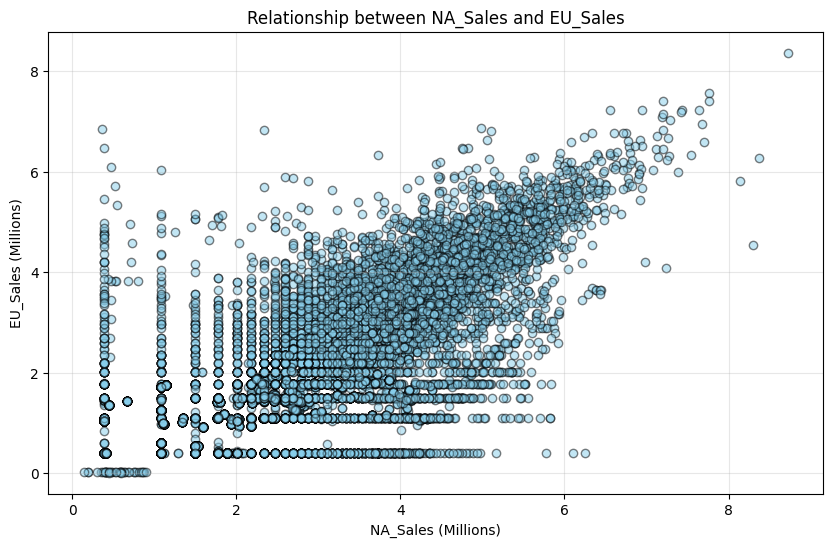

In [16]:
# Scatter plot: NA_Sales vs EU_Sales
plt.figure(figsize=(10,6))
plt.scatter(data['NA_Sales'], data['EU_Sales'], alpha=0.5, color='skyblue', edgecolors='black')

plt.title('Relationship between NA_Sales and EU_Sales')
plt.xlabel('NA_Sales (Millions)')
plt.ylabel('EU_Sales (Millions)')
plt.grid(True, alpha=0.3)
plt.show()

Calculate correlation coefficient:

In [17]:
correlation = data[['NA_Sales', 'EU_Sales']].corr()
print("Correlation Matrix:")
print(correlation)
print(f"\nCorrelation coefficient: {correlation.iloc[0,1]:.3f}")

Correlation Matrix:
          NA_Sales  EU_Sales
NA_Sales  1.000000  0.728037
EU_Sales  0.728037  1.000000

Correlation coefficient: 0.728


**`2. Line Plot - Time Series / Sequential Data`**

Question: How have Global_Sales changed over the years?

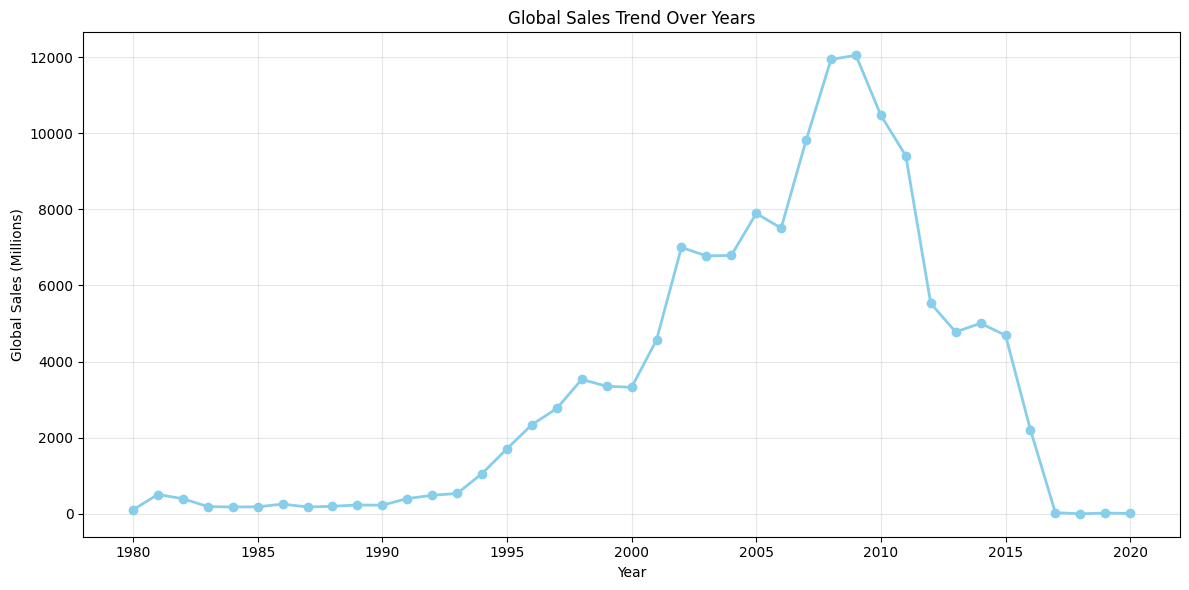

In [18]:
# Group by year and calculate total sales
yearly_sales = data.groupby('Year')['Global_Sales'].sum().reset_index()

# Line plot
plt.figure(figsize=(12,6))
plt.plot(yearly_sales['Year'], yearly_sales['Global_Sales'], marker='o', color='skyblue', linewidth=2, markersize=6)

plt.title('Global Sales Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**`3. Bar Plot (Grouped) - Categorical vs Numerical`**

Question: What is the average Global_Sales for each Genre?

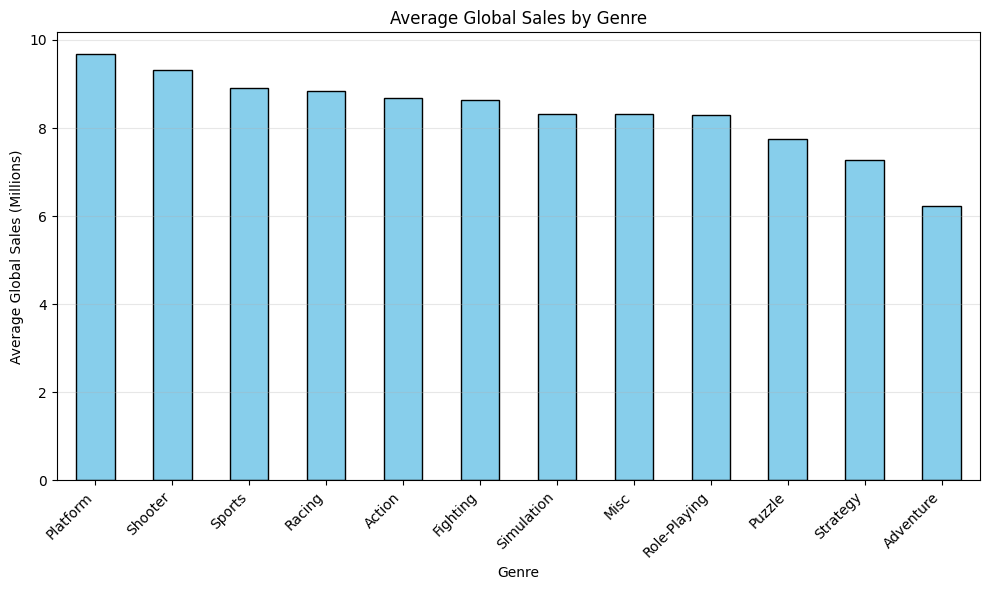

In [14]:
# Calculate average sales by genre
genre_sales = data.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
genre_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**`4. Box Plot (Grouped) - Categorical vs Numerical`**

Question: How does Global_Sales distribution vary across different Platforms?

<Figure size 1200x600 with 0 Axes>

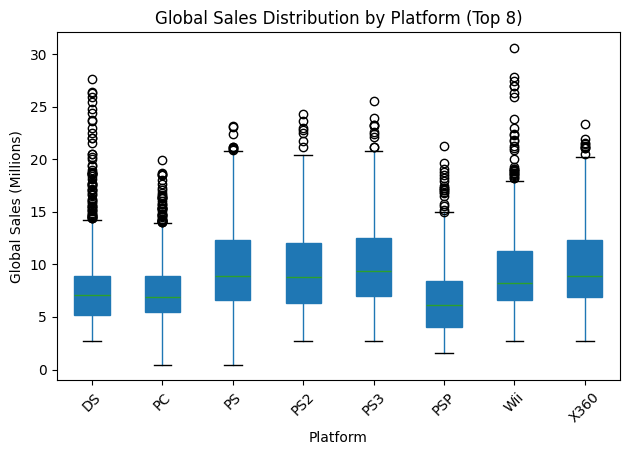

In [19]:
# Select top 8 platforms by count
top_platforms = data['Platform'].value_counts().head(8).index
filtered_data = data[data['Platform'].isin(top_platforms)]

# Box plot
plt.figure(figsize=(12,6))
filtered_data.boxplot(column='Global_Sales', by='Platform', patch_artist=True, grid=False)

plt.suptitle('')  # Remove default title
plt.title('Global Sales Distribution by Platform (Top 8)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using Seaborn for better visualization:

/var/folders/x8/c_fsrl7d13b7p3lggf0ywpdw0000gn/T/ipykernel_50345/364626316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Platform', y='Global_Sales', palette='Set2')


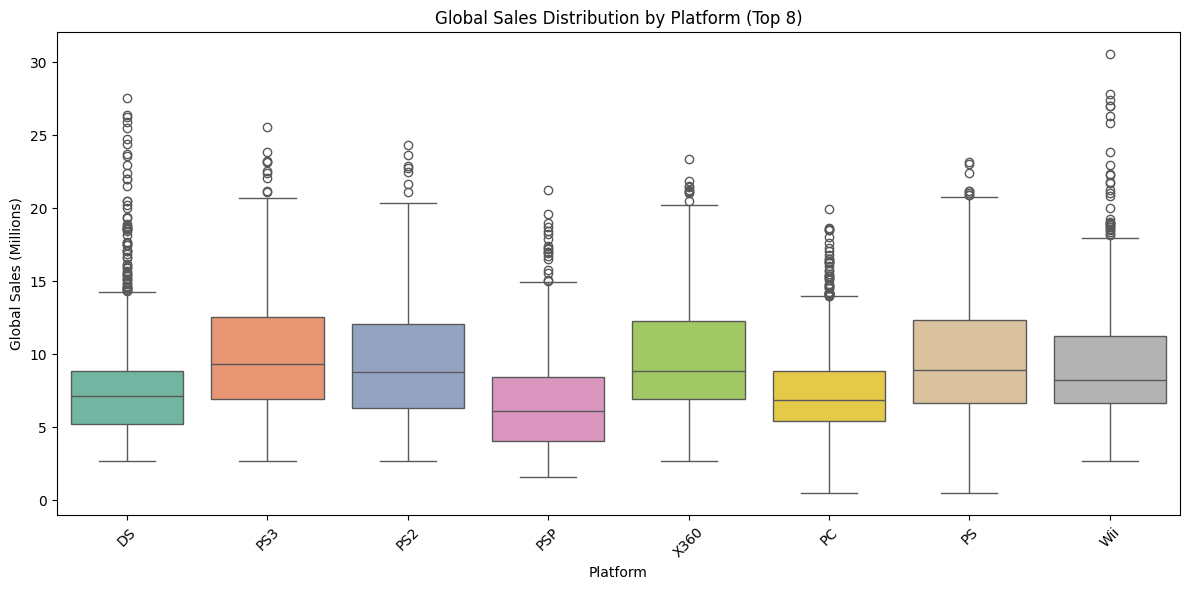

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_data, x='Platform', y='Global_Sales', palette='Set2')

plt.title('Global Sales Distribution by Platform (Top 8)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**`5. Violin Plot - Categorical vs Numerical`**

Question: What is the distribution of Global_Sales across different Genres?

/var/folders/x8/c_fsrl7d13b7p3lggf0ywpdw0000gn/T/ipykernel_50345/3382176849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Genre', y='Global_Sales', palette='muted')


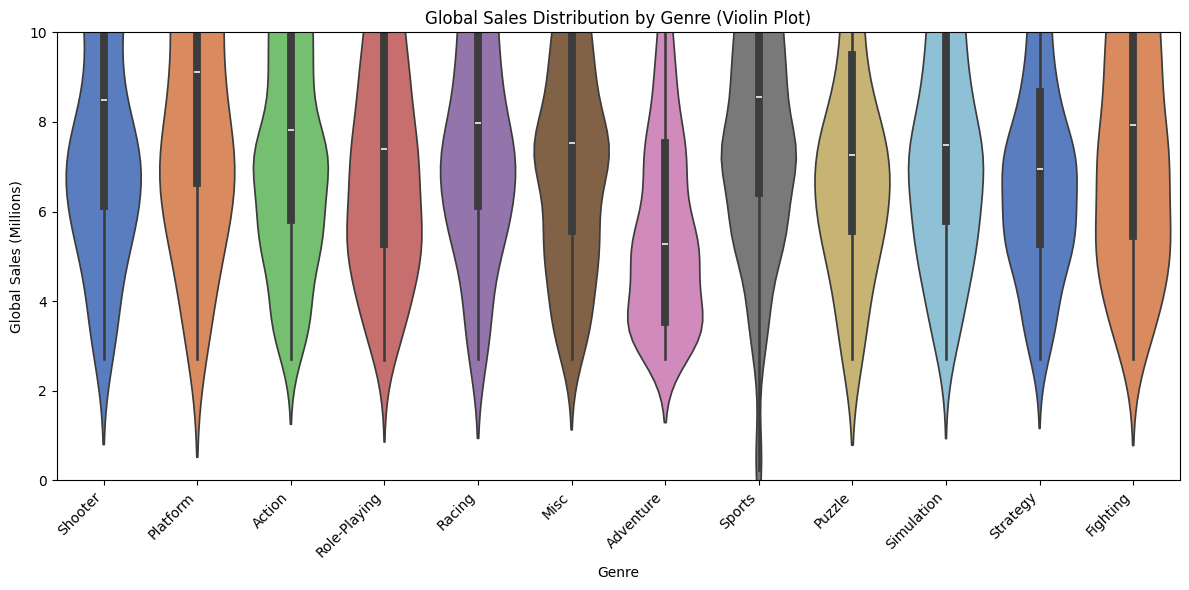

In [22]:
# Violin plot
plt.figure(figsize=(12,6))
sns.violinplot(data=data, x='Genre', y='Global_Sales', palette='muted')

plt.title('Global Sales Distribution by Genre (Violin Plot)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)  # Limit y-axis for better visibility
plt.tight_layout()
plt.show()

**`6. Heatmap - Correlation Matrix (Multiple Numerical Variables)`**

Question: What are the correlations between all regional sales?

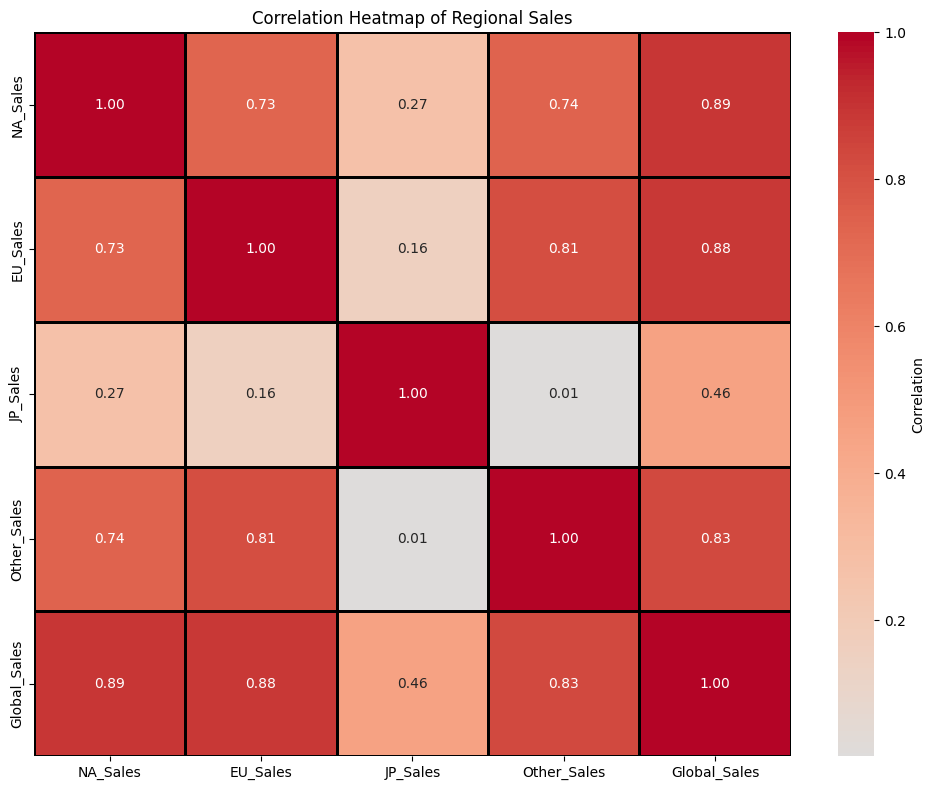

In [23]:
# Select numerical columns
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
correlation_matrix = data[sales_cols].corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            linewidths=1, linecolor='black', fmt='.2f', cbar_kws={'label': 'Correlation'})

plt.title('Correlation Heatmap of Regional Sales')
plt.tight_layout()
plt.show()

**`7. Stacked Bar Chart - Two Categorical Variables`**

Question: How many games in each Genre were released on different Platforms?

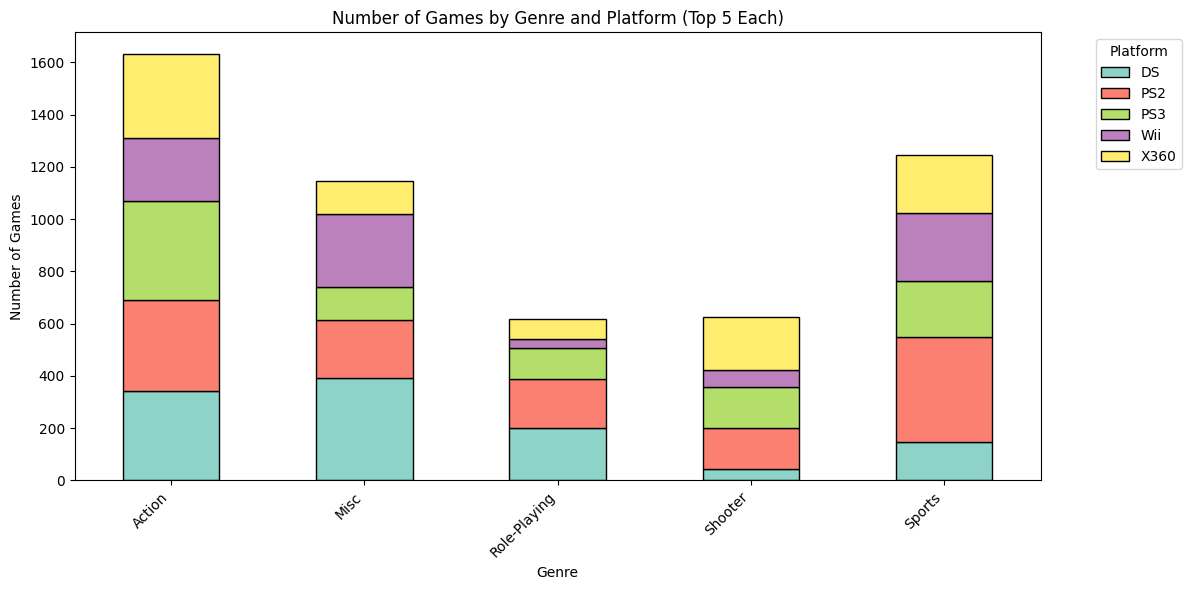

In [24]:
# Select top 5 genres and top 5 platforms
top_genres = data['Genre'].value_counts().head(5).index
top_platforms = data['Platform'].value_counts().head(5).index

# Filter data
filtered = data[data['Genre'].isin(top_genres) & data['Platform'].isin(top_platforms)]

# Create cross-tabulation
cross_tab = pd.crosstab(filtered['Genre'], filtered['Platform'])

# Stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3', edgecolor='black')

plt.title('Number of Games by Genre and Platform (Top 5 Each)')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**`8. Pair Plot - Multiple Numerical Variables`**

Question: What are the pairwise relationships between all regional sales?

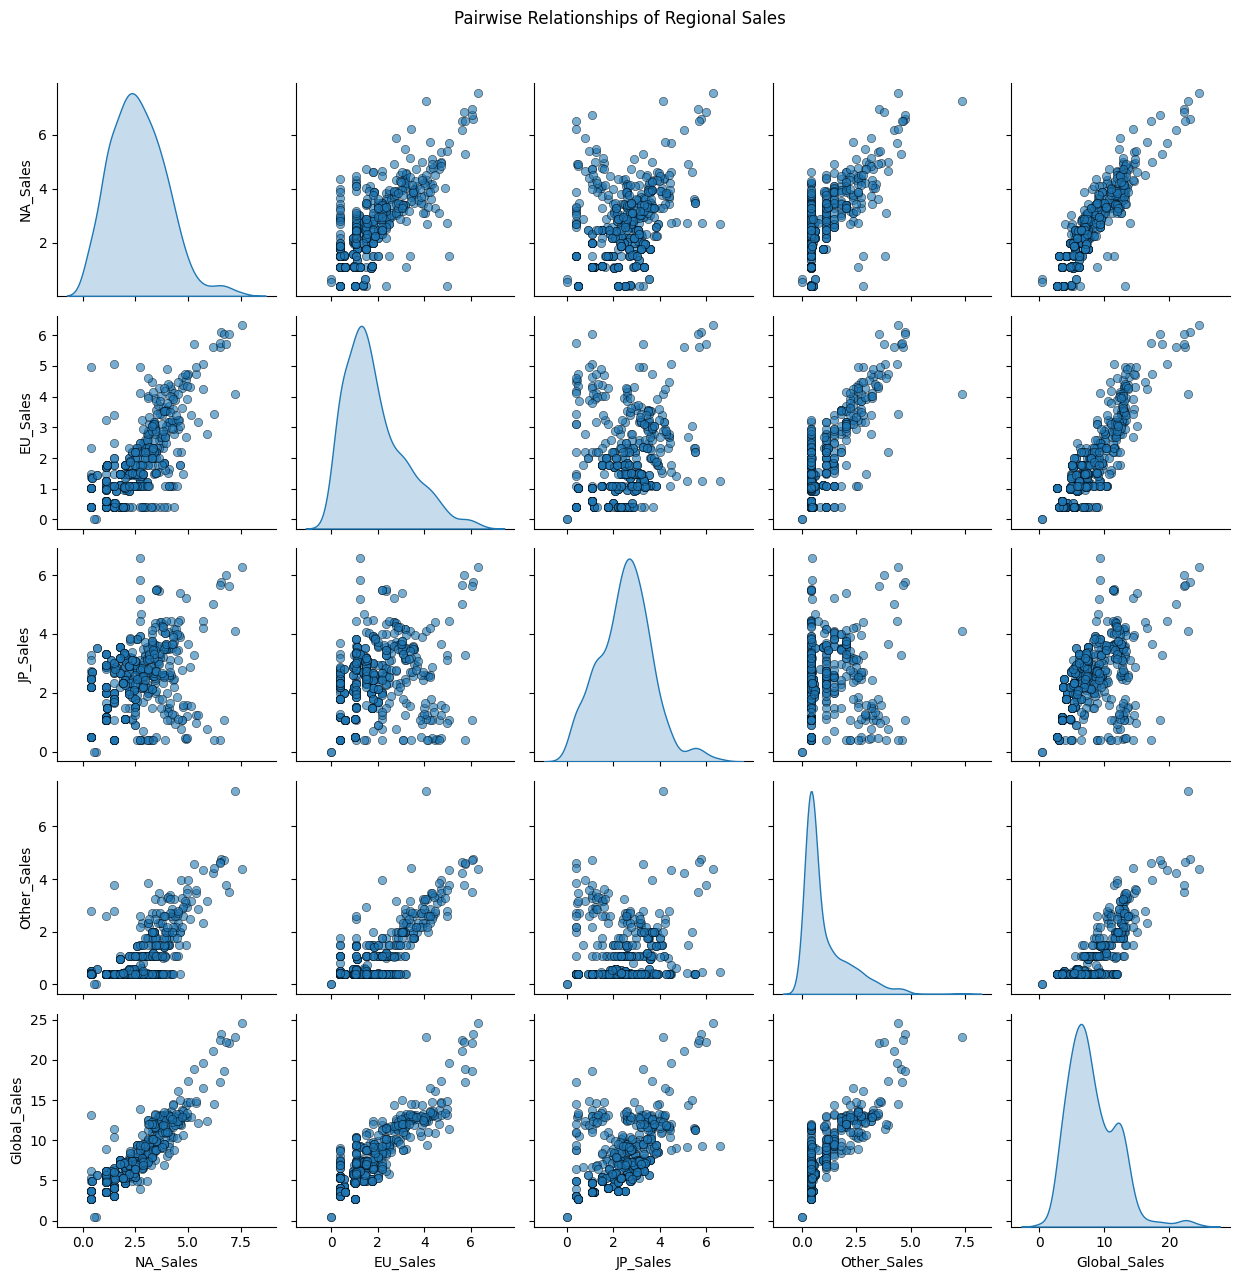

In [25]:
# Sample data for better performance (optional)
sample_data = data[sales_cols].sample(n=500, random_state=42)

# Pair plot
sns.pairplot(sample_data, diag_kind='kde', plot_kws={'alpha': 0.6, 'edgecolor': 'black'})
plt.suptitle('Pairwise Relationships of Regional Sales', y=1.02)
plt.tight_layout()
plt.show()

**`9. Hexbin Plot - Two Numerical Variables (Dense Data)`**

Question: What is the density of relationship between NA_Sales and Global_Sales?

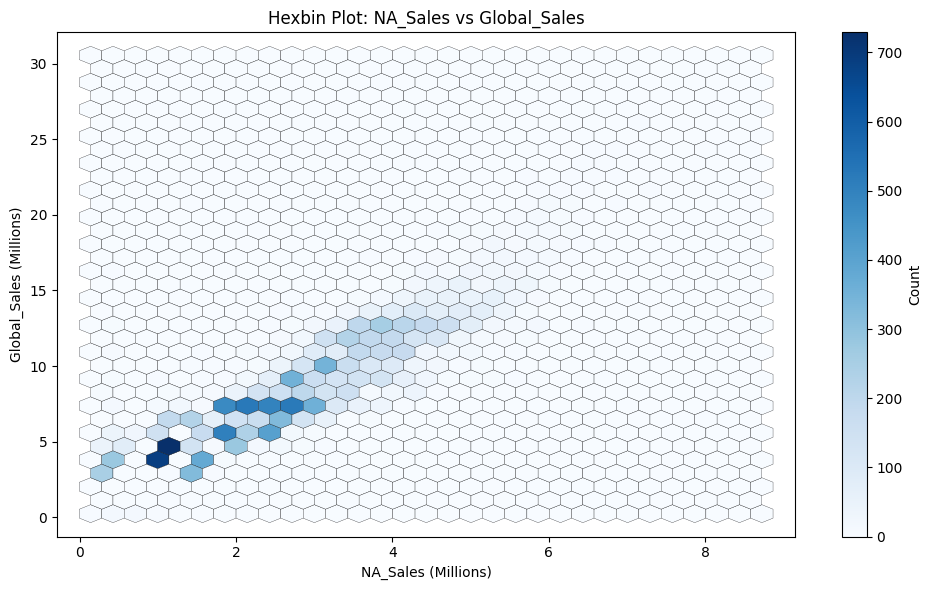

In [26]:
# Hexbin plot
plt.figure(figsize=(10,6))
plt.hexbin(data['NA_Sales'], data['Global_Sales'], gridsize=30, cmap='Blues', edgecolors='black', linewidths=0.2)

plt.colorbar(label='Count')
plt.title('Hexbin Plot: NA_Sales vs Global_Sales')
plt.xlabel('NA_Sales (Millions)')
plt.ylabel('Global_Sales (Millions)')
plt.tight_layout()
plt.show()

**`10. Count Plot - Two Categorical Variables`**

Question: How many games are there for each Genre across different Platforms?

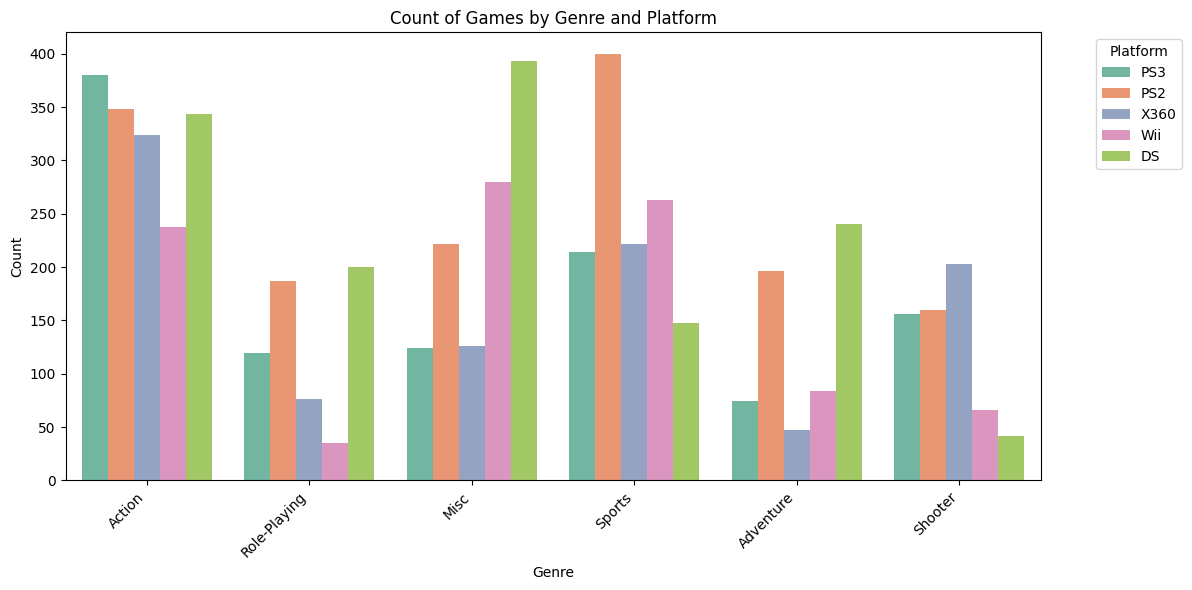

In [27]:
# Select top 6 genres
top_6_genres = data['Genre'].value_counts().head(6).index
filtered = data[data['Genre'].isin(top_6_genres) & data['Platform'].isin(top_platforms)]

# Count plot
plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x='Genre', hue='Platform', palette='Set2')

plt.title('Count of Games by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**`Summary: Bivariate Analysis Techniques`**

| Plot Type | Variable Types | Purpose |
|-----------|---------------|----------|
| Scatter Plot | Numerical vs Numerical | Relationship and correlation |
| Line Plot | Sequential/Time vs Numerical | Trends over time |
| Grouped Bar Plot | Categorical vs Numerical | Compare values across categories |
| Box Plot (Grouped) | Categorical vs Numerical | Distribution comparison |
| Violin Plot | Categorical vs Numerical | Distribution shape comparison |
| Heatmap | Multiple Numerical | Correlation matrix |
| Stacked Bar Chart | Categorical vs Categorical | Composition across categories |
| Pair Plot | Multiple Numerical | All pairwise relationships |
| Hexbin Plot | Numerical vs Numerical | Dense data relationships |
| Count Plot | Categorical vs Categorical | Count comparison |